# Credit Card Fraud Detection

In [57]:
# import necessary libraries 
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
from scipy import stats
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder


## Obtain & Load Data

In [58]:

# Read in the data with read_csv() into a Pandas Dataframe
customer_df=pd.read_csv("data/customer.csv")
terminal_df=pd.read_csv("data/terminal.csv")
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")


## Exploratory data analysis

In [59]:
# To visualize the columns names
customer_df.columns

Index(['CUSTOMER_ID', 'x_customer_id', 'y_customer_id', 'mean_amount',
       'std_amount', 'mean_nb_tx_per_day', 'available_terminals',
       'nb_terminals'],
      dtype='object')

In [60]:
# Using .head() function to view the first rows/records of the "customer" dataset 
customer_df.head()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[316, 406, 447, 523, 968, 1200, 1318, 1365, 16...",10
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",17
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[372, 614, 774, 1362, 1446, 1564, 1637, 1939]",8


In [61]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUSTOMER_ID          1000 non-null   int64  
 1   x_customer_id        1000 non-null   float64
 2   y_customer_id        1000 non-null   float64
 3   mean_amount          1000 non-null   float64
 4   std_amount           1000 non-null   float64
 5   mean_nb_tx_per_day   1000 non-null   float64
 6   available_terminals  1000 non-null   object 
 7   nb_terminals         1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


In [62]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
customer_df.describe(include='all')

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,975,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,"[20, 56, 266, 568, 682, 783, 794, 1010, 1130, ...",NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
mean,499.500000,51.318204,50.397990,51.550697,25.775348,1.956983,NaN,15.117000
std,288.819436,28.893939,28.785699,28.025746,14.012873,1.165512,NaN,4.255987
min,0.000000,0.007245,0.036734,5.063101,2.531550,0.000295,NaN,2.000000
25%,249.750000,27.099437,26.737835,27.596718,13.798359,0.931062,NaN,12.000000
50%,499.500000,50.601090,49.109879,51.596026,25.798013,1.886714,NaN,15.000000
75%,749.250000,76.422770,76.377724,75.304416,37.652208,2.994755,NaN,18.000000


In [63]:
# Verify which features have missing values
customer_df.isnull().sum()

CUSTOMER_ID            0
x_customer_id          0
y_customer_id          0
mean_amount            0
std_amount             0
mean_nb_tx_per_day     0
available_terminals    0
nb_terminals           0
dtype: int64

In [64]:
# Validating there is not duplicated values
total_duplicates_customer = customer_df.duplicated().sum()
print("Total Duplicates:", total_duplicates_customer)

Total Duplicates: 0


In [65]:
# Using .head() function to view the first rows/records of the "terminal" dataset 
terminal_df.head()

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,41.702200,72.032449
1,1,0.011437,30.233257
2,2,14.675589,9.233859
3,3,18.626021,34.556073
4,4,39.676747,53.881673


In [66]:
# To visualize the columns names
terminal_df.columns

Index(['TERMINAL_ID', 'x_terminal_id', 'y_terminal_id'], dtype='object')

In [67]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
terminal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TERMINAL_ID    2000 non-null   int64  
 1   x_terminal_id  2000 non-null   float64
 2   y_terminal_id  2000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [68]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
terminal_df.describe(include='all')

,TERMINAL_ID,x_terminal_id,y_terminal_id
count,2000.000000,2000.000000,2000.000000
mean,999.500000,49.639290,50.635476
std,577.494589,28.807532,28.817640
min,0.000000,0.011437,0.009695
25%,499.750000,24.795839,25.443403
50%,999.500000,50.340815,51.212018
75%,1499.250000,74.303857,75.550561
max,1999.000000,99.859909,99.987579


In [69]:
# Verify which features have missing values
terminal_df.isnull().sum()

TERMINAL_ID      0
x_terminal_id    0
y_terminal_id    0
dtype: int64

In [70]:
# Validating there is not duplicated values
total_duplicates_terminal = customer_df.duplicated().sum()
print("Total Duplicates:", total_duplicates_terminal)

Total Duplicates: 0


In [71]:
# Using .head() function to view the first rows/records of the "train" dataset 
train_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,59383,2021-08-01 00:04:37,323,217,4.60,0
1,59384,2021-08-01 00:12:10,6,429,8.61,0
2,59385,2021-08-01 00:12:34,714,1011,64.00,0
3,59386,2021-08-01 00:15:40,266,1969,12.72,0
4,59387,2021-08-01 00:16:01,890,1482,98.88,0


In [72]:
# To visualize the columns names
train_df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_FRAUD'],
      dtype='object')

In [73]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291231 entries, 0 to 291230
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TRANSACTION_ID  291231 non-null  int64  
 1   TX_DATETIME     291231 non-null  object 
 2   CUSTOMER_ID     291231 non-null  int64  
 3   TERMINAL_ID     291231 non-null  int64  
 4   TX_AMOUNT       291231 non-null  float64
 5   TX_FRAUD        291231 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 13.3+ MB


In [74]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
train_df.describe(include='all')

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
count,291231.000000,291231,291231.000000,291231.000000,291231.000000,291231.000000
unique,NaN,287096,NaN,NaN,NaN,NaN
top,NaN,2021-09-05 10:33:59,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN
mean,204998.000000,NaN,496.256202,993.718526,53.182274,0.022601
std,84071.292461,NaN,285.274966,575.267551,39.573329,0.148627
min,59383.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,132190.500000,NaN,249.000000,496.000000,21.130000,0.000000
50%,204998.000000,NaN,498.000000,1000.000000,44.770000,0.000000
75%,277805.500000,NaN,741.000000,1483.000000,76.850000,0.000000


In [75]:
# Verify which features have missing values
train_df.isnull().sum()

TRANSACTION_ID    0
TX_DATETIME       0
CUSTOMER_ID       0
TERMINAL_ID       0
TX_AMOUNT         0
TX_FRAUD          0
dtype: int64

In [76]:
# Validating there is not duplicated values
total_duplicates = train_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 0


In [77]:
# Using .head() function to view the first rows/records of the "test" dataset 
test_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT
0,352590,2022-01-01 00:03:14,208,640,147.24
1,352591,2022-01-01 00:26:39,851,315,13.27
2,352592,2022-01-01 00:30:30,454,27,70.52
3,352593,2022-01-01 00:31:31,677,1573,44.75
4,352594,2022-01-01 00:56:18,322,1398,37.60


In [78]:
# To visualize the columns names
test_df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT'],
      dtype='object')

In [79]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226731 entries, 0 to 226730
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TRANSACTION_ID  226731 non-null  int64  
 1   TX_DATETIME     226731 non-null  object 
 2   CUSTOMER_ID     226731 non-null  int64  
 3   TERMINAL_ID     226731 non-null  int64  
 4   TX_AMOUNT       226731 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.6+ MB


In [80]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
test_df.describe(include='all')

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT
count,226731.000000,226731,226731.000000,226731.000000,226731.000000
unique,NaN,223535,NaN,NaN,NaN
top,NaN,2022-01-27 16:46:20,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN
mean,465955.000000,NaN,496.092255,995.198129,53.229134
std,65451.746279,NaN,285.117396,575.763159,39.569785
min,352590.000000,NaN,0.000000,0.000000,0.000000
25%,409272.500000,NaN,249.000000,495.000000,21.210000
50%,465955.000000,NaN,498.000000,1002.000000,44.830000
75%,522637.500000,NaN,740.000000,1487.000000,76.850000


In [81]:
# Verify which features have missing values
test_df.isnull().sum()

TRANSACTION_ID    0
TX_DATETIME       0
CUSTOMER_ID       0
TERMINAL_ID       0
TX_AMOUNT         0
dtype: int64

In [82]:
# Validating there is not duplicated values
total_duplicates_test = test_df.duplicated().sum()
print("Total Duplicates:", total_duplicates_test)

Total Duplicates: 0


## Use visualizations to understand the relationship of the target variable with other features

In [83]:

# Change to catgorical column
train_df['TX_FRAUD'] = train_df['TX_FRAUD'].astype(str)

#Obtain the value counts and print them. We reset the index to make this a bit easier to plot.
fraud_v_counts = train_df['TX_FRAUD'].value_counts().reset_index()
#Rename the columns of this (now) df. 
fraud_v_counts.columns = ['Fraud', 'Value_Count']
#Recode the type, again, for plotting. Here, I will just rename the column values as well.
col_values = ['Not Fraud', 'Is Fraud']
fraud_v_counts['Fraud'] = col_values

print(f"Number of Fraud: {fraud_v_counts['Value_Count'][1]}\nNumber of NOT Fraud: {fraud_v_counts['Value_Count'][0]}")
print(f"The ratio between the two is: " \
f"{fraud_v_counts['Value_Count'][1]/(fraud_v_counts['Value_Count'][1]+fraud_v_counts['Value_Count'][0])} Fraud, " \
f"{fraud_v_counts['Value_Count'][0]/(fraud_v_counts['Value_Count'][1]+fraud_v_counts['Value_Count'][0])} Not Fraud")

Number of Fraud: 6582
Number of NOT Fraud: 284649
The ratio between the two is: 0.022600616005851025 Fraud, 0.9773993839941489 Not Fraud


In [84]:
# Plot the distribution of the target variable (TX_FRAUD) using a histogram

# Utilizing value counts for the categorical column
fig = px.bar(fraud_v_counts, x='Fraud', y='Value_Count', title="Value Counts of Target Variable 'fraud'",
            color='Fraud', color_discrete_map={
                'Not Fraud': '#300085',
                'Is Fraud': '#87CEEB'
            })

# Set the title, font, and axis names
fig.update_layout(
    title_x=0.5,  #Center the title
    font=dict(family="Gill Sans MT", color="black",size=24),
    xaxis_title="",
    yaxis_title="Frequency",
    showlegend=False,
    width = 800,
    height=500
)

# Set x-axis tick values
fig.update_xaxes(tickvals=[0, 1], ticktext=['Not Fraud', 'Is Fraud'])
fig.update_traces(marker_line_color='Blue', marker_line_width=2.33)
fig.show()

We can see that the classes are unbalanced. Showing a significatively difference between the amount of records for Not fraud than Is Fraud.

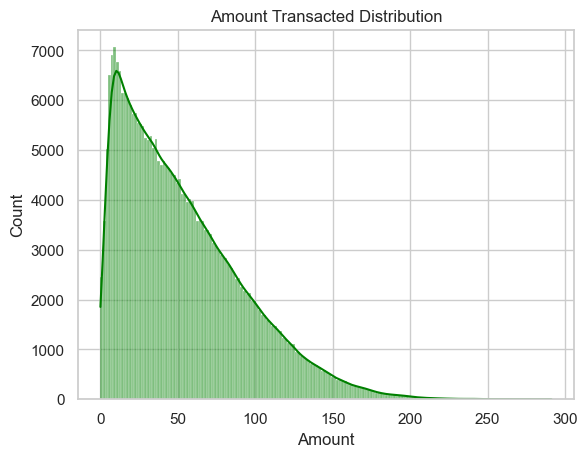

In [85]:
plt.figure()
sns.histplot(data=train_df, x='TX_AMOUNT', kde=True, color='Green')
plt.title('Amount Transacted Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

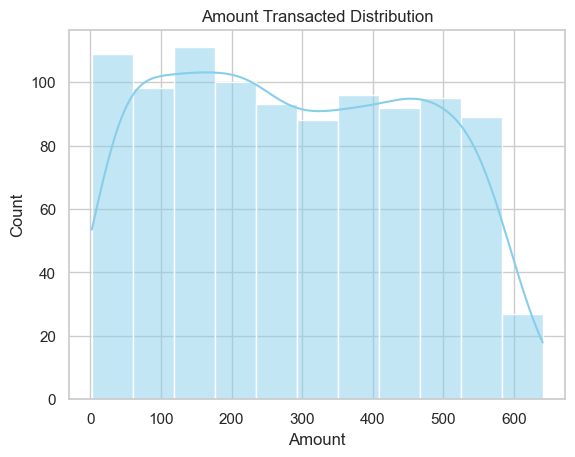

In [86]:
plt.figure()

# Group the DataFrame by the Customer_ID column and count occurrences
transaction_counts = train_df.groupby('CUSTOMER_ID').size()
sns.histplot(data=train_df, x=transaction_counts, kde=True, color='skyblue')
plt.title('Amount Transacted Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

## Prepare & Preprocess Data

In [87]:
# Merge train dataset with customer and terminal datasets to include customer and terminal information relevant to each transaction 
df = pd.merge(train_df, customer_df, on='CUSTOMER_ID', how='left')
df = df.merge(terminal_df, on='TERMINAL_ID', how='left')

## Feature Enginering

Create features that capture the behavior of transactions, customers, and terminals

In [88]:
# Calculate the distance between customer and terminal
df['distance'] = np.sqrt((df['x_customer_id'] - df['x_terminal_id'])**2 + (df['y_customer_id'] - df['y_terminal_id'])**2)

# Calculate the deviation of transaction amount from the customer's mean amount
df['amount_deviation'] = np.abs(df['TX_AMOUNT'] - df['mean_amount'])

In [89]:
# remove x_customer_id, y_customer_id, x_terminal_id, y_terminal_id
df = df.drop('x_customer_id', axis=1)
df = df.drop('y_customer_id', axis=1)
df = df.drop('x_terminal_id', axis=1)
df = df.drop('y_terminal_id', axis=1)


In [90]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])  # Convert to datetime
df['month'] = df['TX_DATETIME'].dt.month
df['day'] = df['TX_DATETIME'].dt.day
df['hour'] = df['TX_DATETIME'].dt.hour

In [91]:
df.drop("TX_DATETIME", axis=1, inplace= True)

Here we assign a value of 0 if the terminal where the transaction was done is in the list of available terminals. Otherwise it assigns a value of 1.

In [92]:
import ast

df['available_terminals'] = df['available_terminals'].apply(ast.literal_eval)

df['TX_Terminal'] = df.apply(lambda row: 0 if row['TERMINAL_ID'] in row['available_terminals'] else 1, axis=1)

df[df['TX_Terminal'] ==1]

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,distance,amount_deviation,month,day,hour,TX_Terminal


We see that all the terminal ID's are in the list so we drop the column and the column of available terminals, because there is nothing else we can do with them.

In [94]:
print(df[df['TX_Terminal'] ==0].shape[0])
print(df.shape[0])

291231
291231


In [95]:
df.drop("TX_Terminal", inplace= True, axis=1)
df.drop("available_terminals", inplace= True, axis=1)


Here we see that the column TX_FRAUD is an object type, but given that it only can takes values 0 or 1 we are going to convert it to integer.

In [96]:
df.dtypes

TRANSACTION_ID          int64
CUSTOMER_ID             int64
TERMINAL_ID             int64
TX_AMOUNT             float64
TX_FRAUD               object
mean_amount           float64
std_amount            float64
mean_nb_tx_per_day    float64
nb_terminals            int64
distance              float64
amount_deviation      float64
month                   int32
day                     int32
hour                    int32
dtype: object

In [97]:
df["TX_FRAUD"] = df["TX_FRAUD"].astype(int)
df.dtypes

TRANSACTION_ID          int64
CUSTOMER_ID             int64
TERMINAL_ID             int64
TX_AMOUNT             float64
TX_FRAUD                int32
mean_amount           float64
std_amount            float64
mean_nb_tx_per_day    float64
nb_terminals            int64
distance              float64
amount_deviation      float64
month                   int32
day                     int32
hour                    int32
dtype: object

In [98]:
df['TX_FRAUD'].value_counts()

TX_FRAUD
0    284649
1      6582
Name: count, dtype: int64

Text(0.5, 0, 'Fraud Detection')

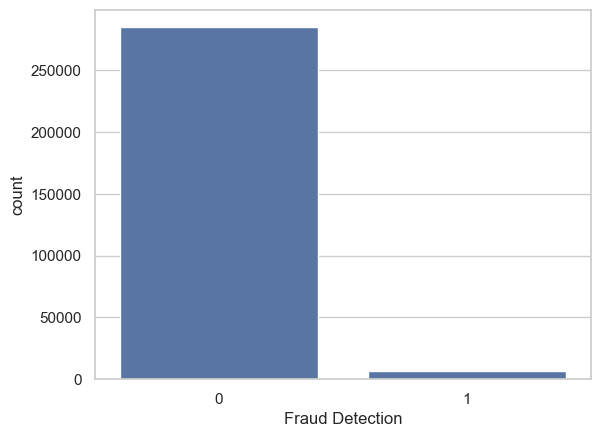

In [42]:
plt.figure()
sns.countplot(df, x="TX_FRAUD")
plt.xlabel('Fraud Detection')

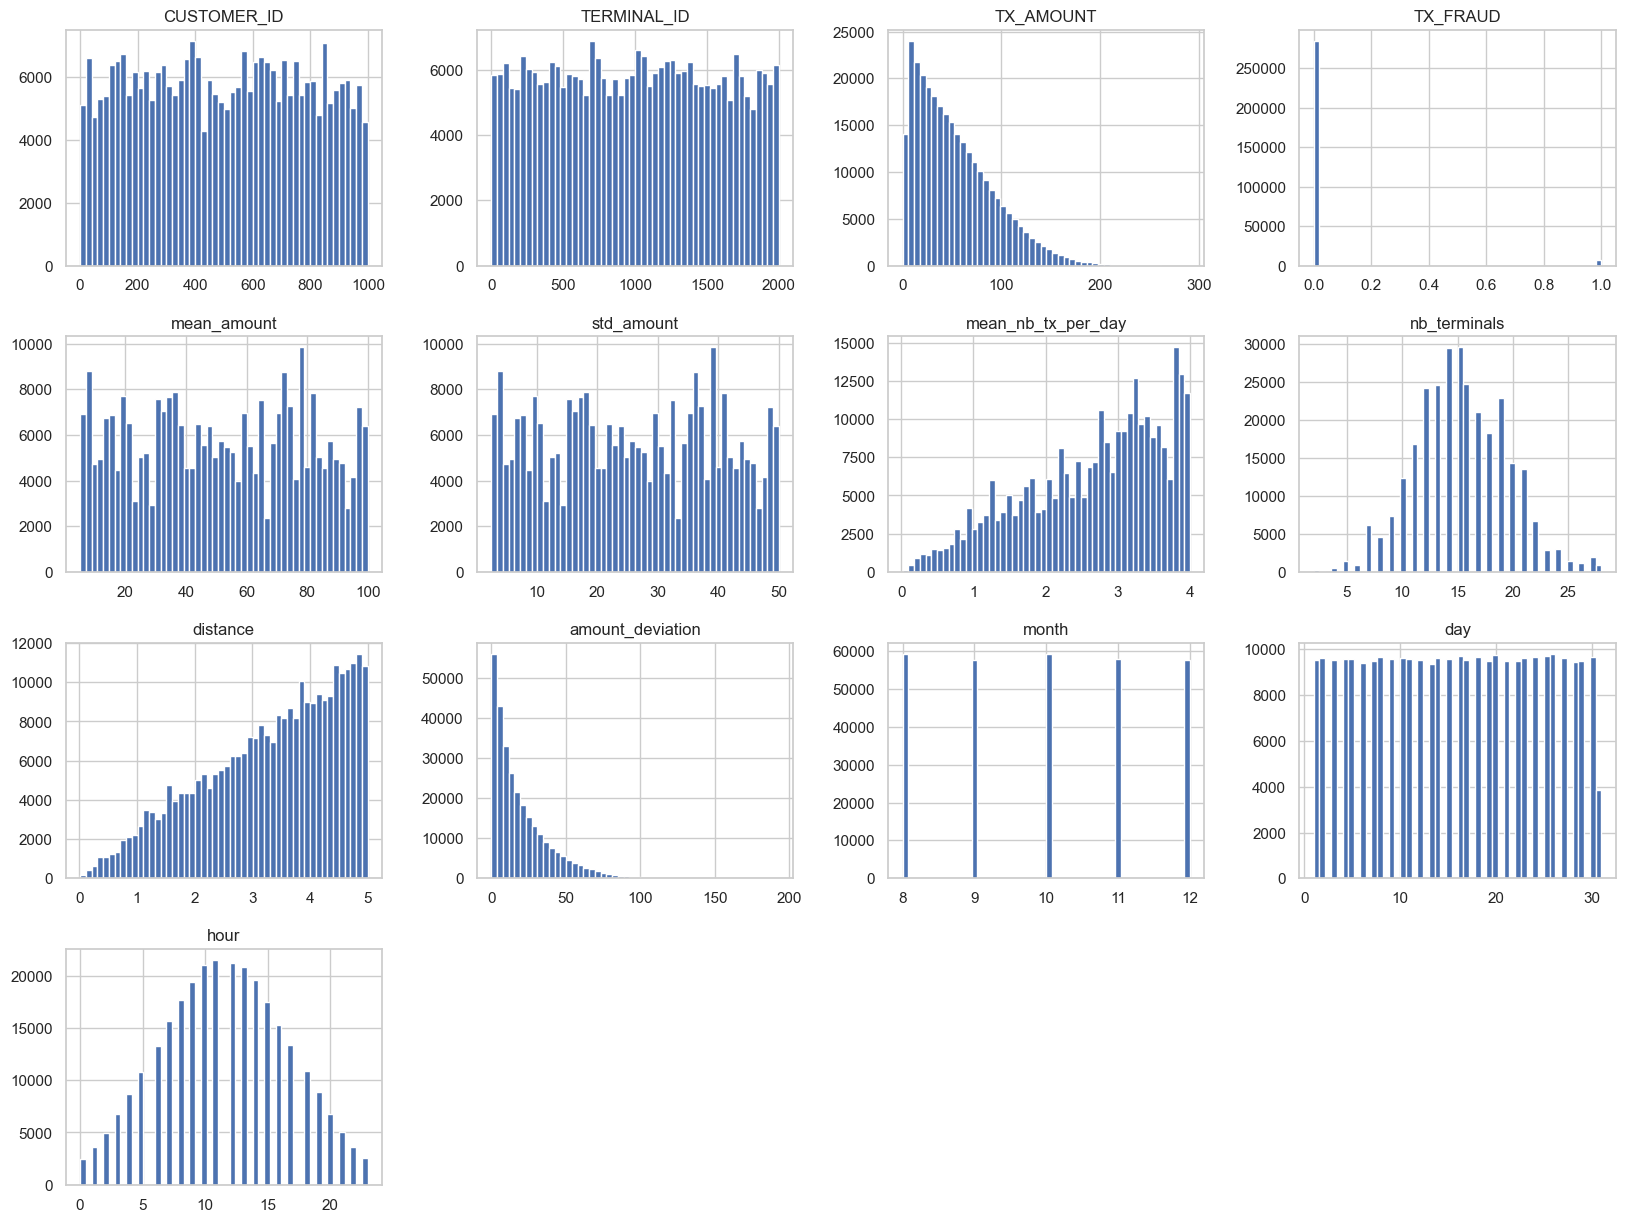

In [43]:
df.hist(bins=50, figsize=(20,15))
plt.show()

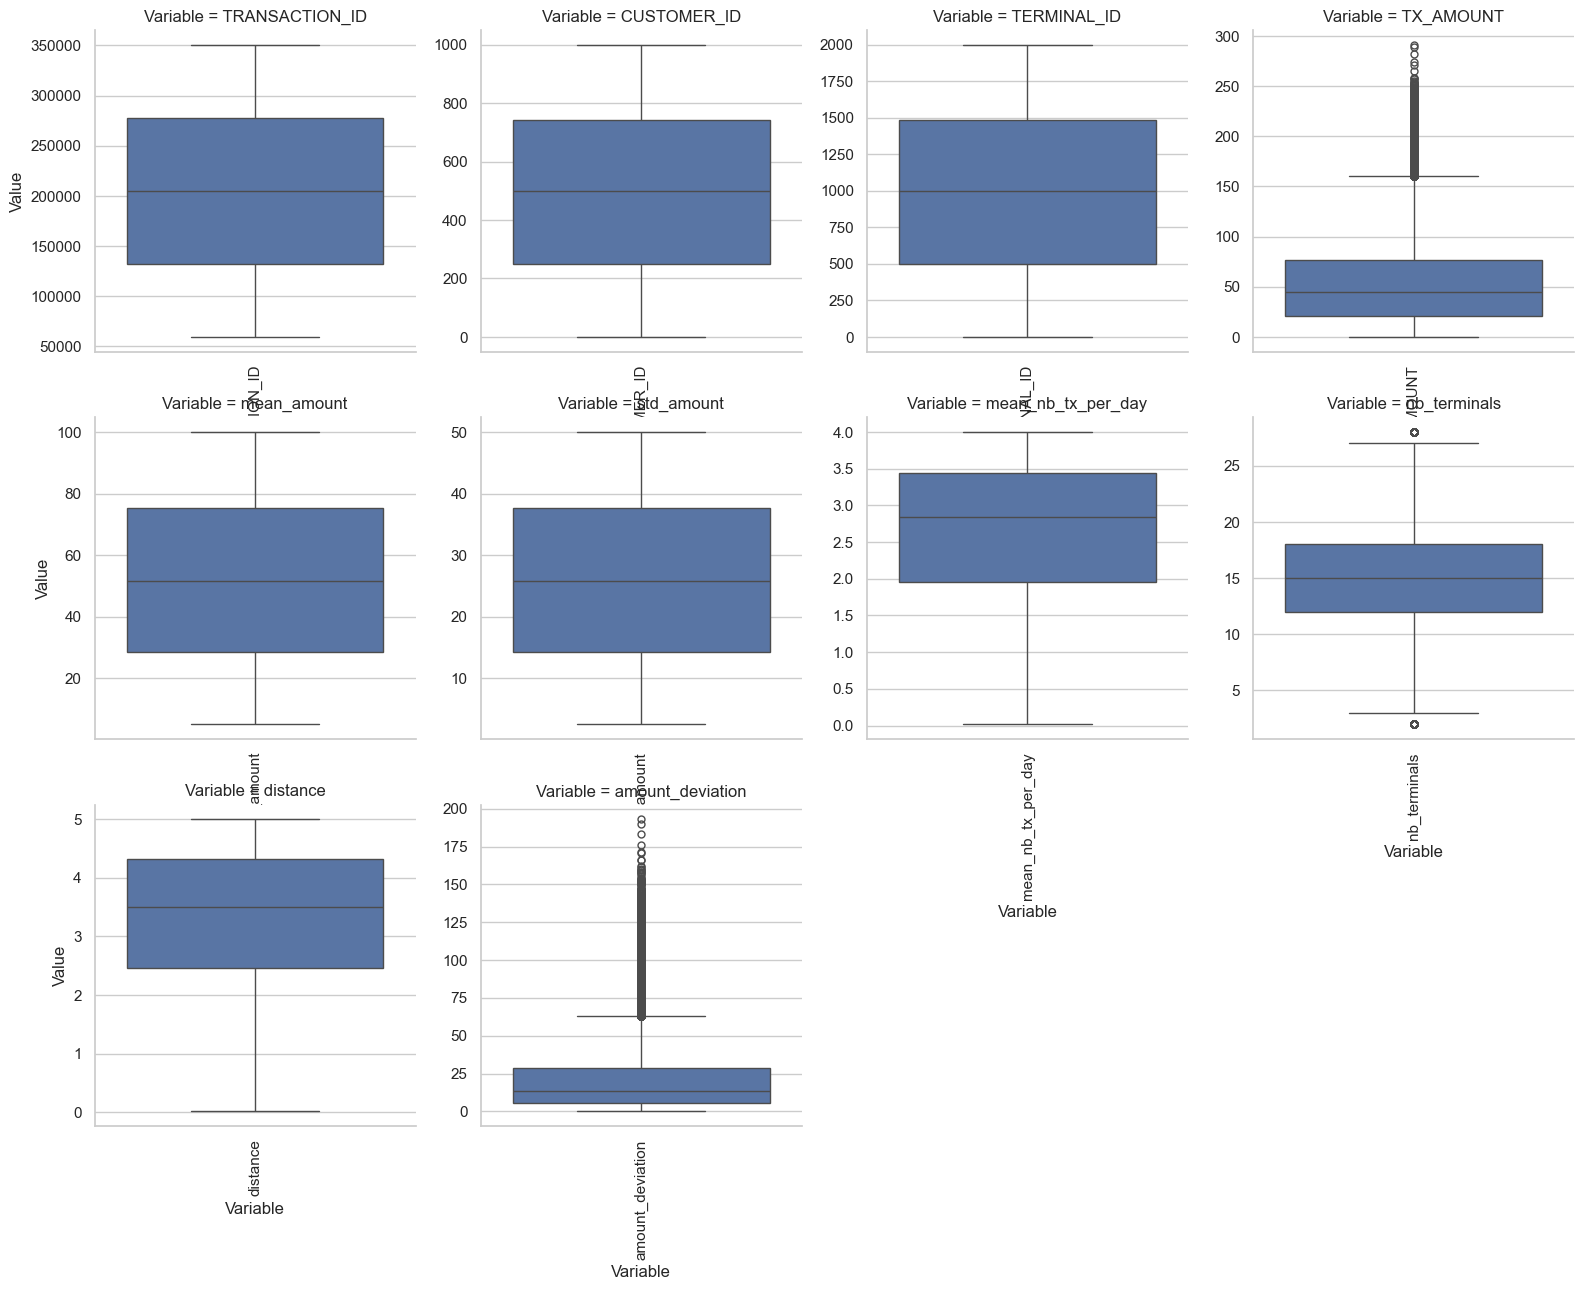

In [99]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
melted_df = pd.melt(df[numeric_cols], var_name='Variable', value_name='Value')

g = sns.catplot(x='Variable', y='Value', col='Variable',
                data=melted_df, kind='box',
                col_wrap=4, 
                sharex=False, sharey=False,
                height=4, aspect=1)

g.set_xticklabels(rotation=90)
plt.show()

In [100]:
column_name = 'TX_AMOUNT'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outliers as those below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR)
TX_AMOUNT_outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]

# Count of outliers
outlier_count = TX_AMOUNT_outliers.shape[0]

print(f"Number of outliers in {column_name}: {outlier_count}")

Number of outliers in TX_AMOUNT: 4117


In [101]:
column_name = 'amount_deviation'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outliers as those below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR)
amount_deviation_outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]

# Count of outliers
outlier_count = amount_deviation_outliers.shape[0]

print(f"Number of outliers in {column_name}: {outlier_count}")

Number of outliers in amount_deviation: 11921


In [102]:
index_to_remove = TX_AMOUNT_outliers.index.union(amount_deviation_outliers.index)

In [103]:
df.drop(index_to_remove, inplace=True)

In [104]:
df['TX_FRAUD'].value_counts()

TX_FRAUD
0    273088
1      6169
Name: count, dtype: int64

We can also create a feature with the difference between the transaction value and the mean amount:

In [105]:
df["transation_mean_difference"] = df["TX_AMOUNT"] - df["mean_amount"]

Sotre a version of the dataframe until now:

In [106]:
df_pre_standarization = df.copy()

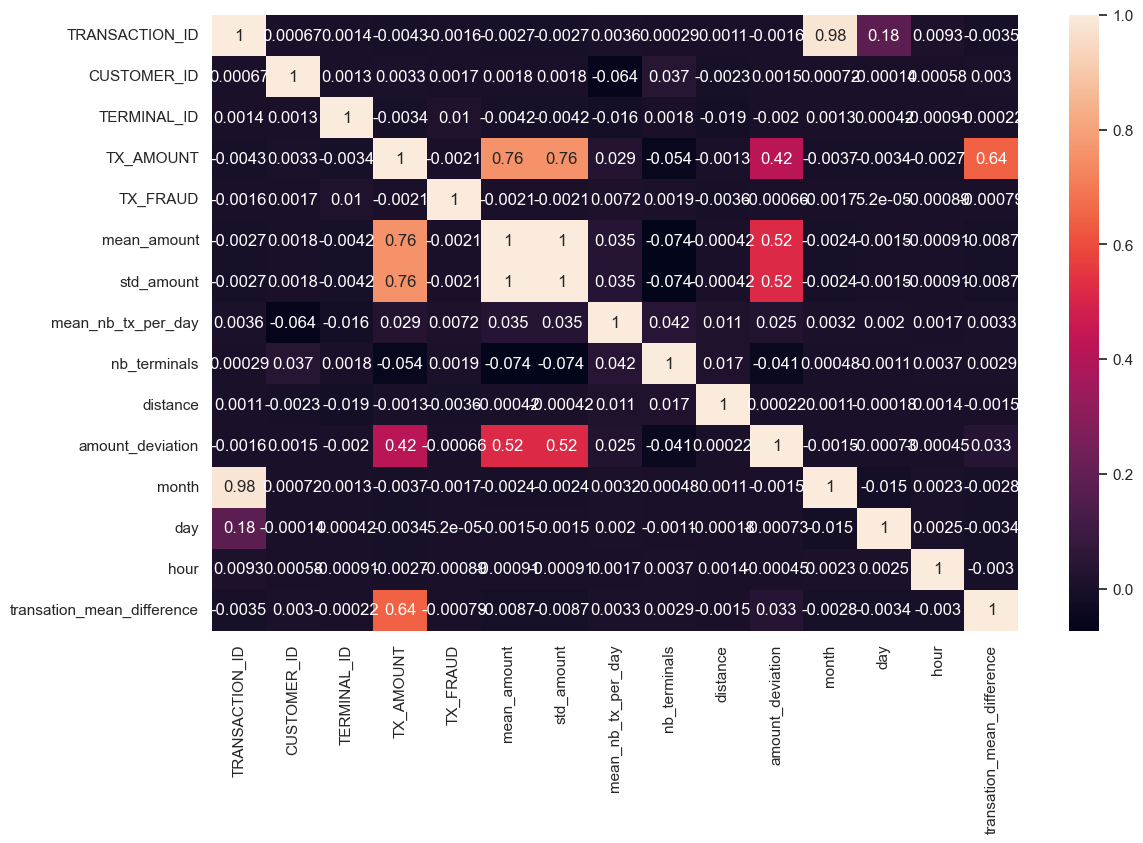

In [107]:
# Plot a graphical correlation matrix for each pair of columns in the dataframe
corr = df.corr() # data frame correlation function

# make the heatmap larger in size
plt.figure(figsize = (13,8))

sns.heatmap(corr, annot=True)
plt.show()

We see that the feature "std_amount" has a high correlation with three different features, so we are droping it. Also we are droping the transaction ID, given that this is irrelevant to detect if a transaction is fraudulent or no. Alse, customer and terminal ID's are beign dropped.

In [108]:
df.drop(columns = ["std_amount", "TRANSACTION_ID", "CUSTOMER_ID", "TERMINAL_ID"], inplace= True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279257 entries, 0 to 291230
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TX_AMOUNT                   279257 non-null  float64
 1   TX_FRAUD                    279257 non-null  int32  
 2   mean_amount                 279257 non-null  float64
 3   mean_nb_tx_per_day          279257 non-null  float64
 4   nb_terminals                279257 non-null  int64  
 5   distance                    279257 non-null  float64
 6   amount_deviation            279257 non-null  float64
 7   month                       279257 non-null  int32  
 8   day                         279257 non-null  int32  
 9   hour                        279257 non-null  int32  
 10  transation_mean_difference  279257 non-null  float64
dtypes: float64(6), int32(4), int64(1)
memory usage: 21.3 MB


##### Heatmap after removing correlation

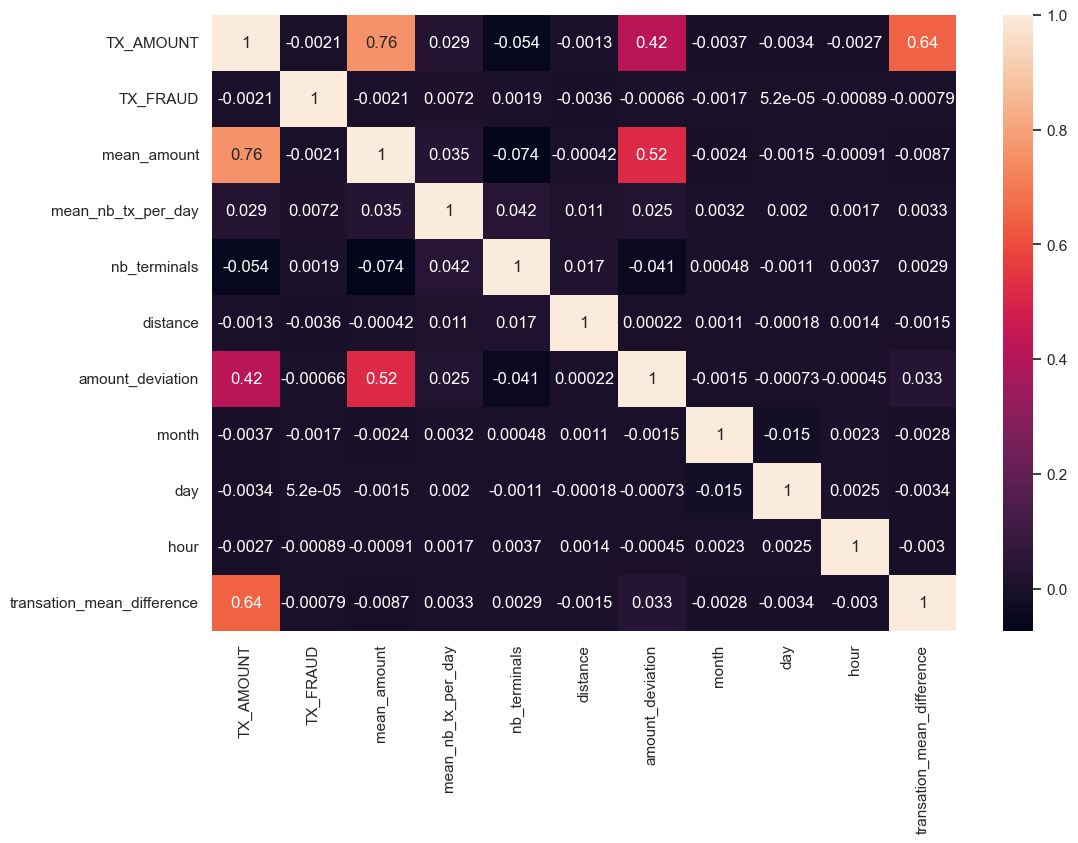

In [110]:
corr = df.corr(numeric_only=True) 

#make the heatmap larger in size
plt.figure(figsize = (12,8))

sns.heatmap(corr, annot=True)
plt.show()

In [111]:
df.head()

,TX_AMOUNT,TX_FRAUD,mean_amount,mean_nb_tx_per_day,nb_terminals,distance,amount_deviation,month,day,hour,transation_mean_difference
0,4.60,0,7.353061,3.324124,19,4.635184,2.753061,8,1,0,-2.753061
1,8.61,0,18.618562,3.778676,16,3.345987,10.008562,8,1,0,-10.008562
2,64.00,0,82.620413,3.723765,13,3.452222,18.620413,8,1,0,-18.620413
3,12.72,0,9.852171,3.862067,15,1.950316,2.867829,8,1,0,2.867829
4,98.88,0,83.660035,3.128315,20,4.934747,15.219965,8,1,0,15.219965


## Random forest

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and TX_FRAUD is the target variable

# Separate features and target
X = df.drop('TX_FRAUD', axis=1)  # Make sure df is your DataFrame variable
y = df['TX_FRAUD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on both the training and testing data
train_predictions = rf_classifier.predict(X_train_scaled)
test_predictions = rf_classifier.predict(X_test_scaled)

# Calculate and print metrics for the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, pos_label=1)
train_f1 = f1_score(y_train, train_predictions, pos_label=1)

print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print(" ")

print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"F1-Score: {train_f1}\n")

# Calculate and print metrics for the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, pos_label=1)
test_f1 = f1_score(y_test, test_predictions, pos_label=1)

print("Testing Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"F1-Score: {test_f1}\n")




[[54613     6]
 [ 1214    19]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     54619
           1       0.76      0.02      0.03      1233

    accuracy                           0.98     55852
   macro avg       0.87      0.51      0.51     55852
weighted avg       0.97      0.98      0.97     55852

 
Training Metrics:
Accuracy: 0.9999820952977776
Precision: 1.0
F1-Score: 0.9995946493717065

Testing Metrics:
Accuracy: 0.9781565566139082
Precision: 0.76
F1-Score: 0.030206677265500796



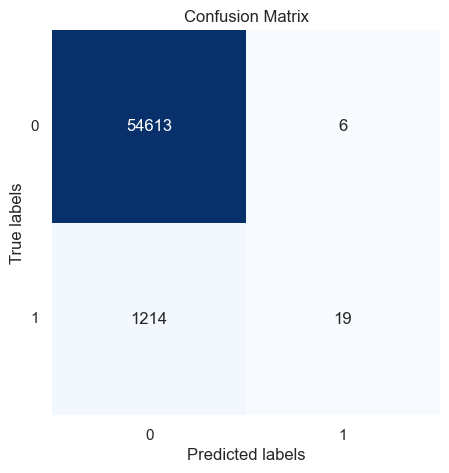

In [114]:
# Generate the confusion matrix again for clarity
cm = confusion_matrix(y_test, test_predictions)

# Plot using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test), rotation=0)
plt.show()


## Random forest with SMOTE

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and TX_FRAUD is the target variable

# Separate features and target
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally address class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_smote_scaled, y_train_smote)

# Make predictions on the training data
train_predictions = rf_classifier.predict(X_train_smote_scaled)

# Make predictions
predictions = rf_classifier.predict(X_test_scaled)

# Evaluate the model on the training data
print("Training accuracy:", accuracy_score(y_train_smote, train_predictions))
print("Training precision:", precision_score(y_train_smote, train_predictions, pos_label=1))
print("Training F1-score:", f1_score(y_train_smote, train_predictions, pos_label=1))

# Evaluate the model on the test data
print("\nTest Metrics:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Test precision:", precision_score(y_test.astype(int), predictions.astype(int), pos_label=1))

Training accuracy: 1.0
Training precision: 1.0
Training F1-score: 1.0

Test Metrics:
[[54169   450]
 [ 1052   181]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     54619
           1       0.29      0.15      0.19      1233

    accuracy                           0.97     55852
   macro avg       0.63      0.57      0.59     55852
weighted avg       0.97      0.97      0.97     55852

Test accuracy: 0.9731074983885984
Test precision: 0.2868462757527734


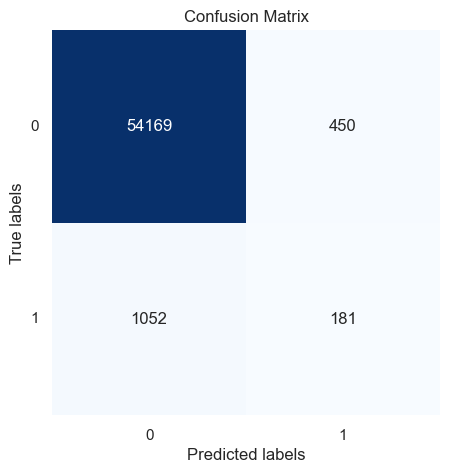

In [116]:
# Generate the confusion matrix again for clarity
cm = confusion_matrix(y_test, predictions)

# Plot using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test), rotation=0)
plt.show()


## XGBoost

In [117]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame and TX_FRAUD is the target variable

# Separate features and target
X = df.drop('TX_FRAUD', axis=1)  # Assuming 'df' is defined earlier
y = df['TX_FRAUD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on both the training and testing data
train_predictions = xgb_classifier.predict(X_train_scaled)
test_predictions = xgb_classifier.predict(X_test_scaled)

# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, pos_label=1)
train_f1 = f1_score(y_train, train_predictions, pos_label=1)

print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"F1-Score: {train_f1}\n")

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, pos_label=1)
test_f1 = f1_score(y_test, test_predictions, pos_label=1)

print("Testing Metrics:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"F1-Score: {test_f1}")


Training Metrics:
Accuracy: 0.9790917839797677
Precision: 0.9401993355481728
F1-Score: 0.10807714340271148

Testing Metrics:
[[54607    12]
 [ 1213    20]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     54619
           1       0.62      0.02      0.03      1233

    accuracy                           0.98     55852
   macro avg       0.80      0.51      0.51     55852
weighted avg       0.97      0.98      0.97     55852

Accuracy: 0.9780670343049488
Precision: 0.625
F1-Score: 0.03162055335968379


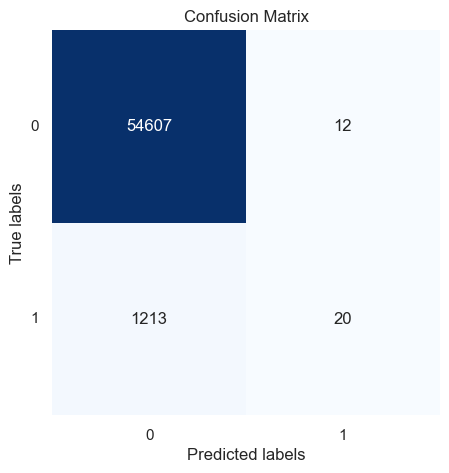

In [118]:
# Generate the confusion matrix again for clarity
cm = confusion_matrix(y_test, test_predictions)

# Plot using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test), rotation=0)
plt.show()


## XGBoost with SMOTE

In [119]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df is your DataFrame and TX_FRAUD is the target variable

# Separate features and target
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally address class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
# Adjust the scale_pos_weight parameter according to the level of class imbalance
# scale_pos_weight = sum(negative instances) / sum(positive instances)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=(len(y) - sum(y)) / sum(y))

# Train the model
xgb_classifier.fit(X_train_smote_scaled, y_train_smote)

# Make predictions on the training data
train_predictions = xgb_classifier.predict(X_train_smote_scaled)

# Make predictions
predictions = xgb_classifier.predict(X_test_scaled)

# Evaluate the model on the training data
print("Training accuracy:", accuracy_score(y_train_smote, train_predictions))
print("Training precision:", precision_score(y_train_smote, train_predictions, pos_label=1))
print("Training F1-score:", f1_score(y_train_smote, train_predictions, pos_label=1))

# Evaluate the model on the test data
print("\nTest Metrics:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Test precision:", precision_score(y_test.astype(int), predictions.astype(int), pos_label=1))


Training accuracy: 0.679725727677611
Training precision: 0.6095980840676717
Training F1-score: 0.7573552870677338

Test Metrics:
[[19389 35230]
 [  181  1052]]
              precision    recall  f1-score   support

           0       0.99      0.35      0.52     54619
           1       0.03      0.85      0.06      1233

    accuracy                           0.37     55852
   macro avg       0.51      0.60      0.29     55852
weighted avg       0.97      0.37      0.51     55852

Test accuracy: 0.3659851034877892
Test precision: 0.028995093985998567


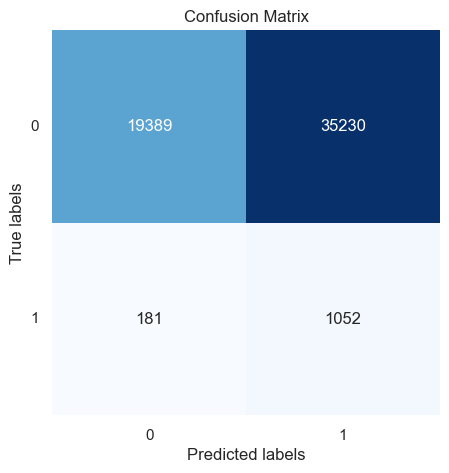

In [120]:
# Generate the confusion matrix again for clarity
cm = confusion_matrix(y_test, predictions)

# Plot using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test), rotation=0)
plt.show()

## LDA

In [121]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Assuming X and y are your features and target variable
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

# Initialize LDA
lda = LDA(n_components=1)  # n_components should be < n_classes - 1

# Fit LDA on the dataset
X_lda = lda.fit_transform(X, y)

# Optionally, use LDA for classification
# lda_classifier = lda.fit(X, y)
# predictions = lda_classifier.predict(X_test)


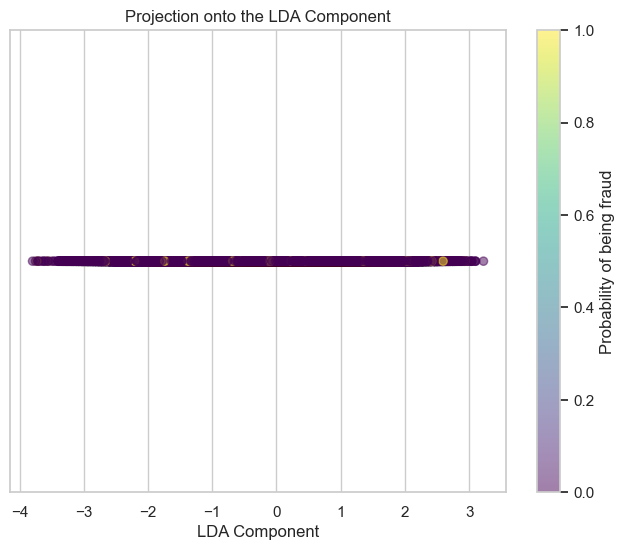

In [122]:
# Plotting the projection of the data onto the LDA component
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda, [0] * len(X_lda), c=y, cmap='viridis',  alpha=0.5)
plt.colorbar(scatter, label='Probability of being fraud')
plt.title('Projection onto the LDA Component')
plt.xlabel('LDA Component')
plt.yticks([])  # Hide y-axis ticks
plt.show()


## PCA

In [123]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `df` is your DataFrame and it contains only numerical features
X = df  # If you have a target variable, ensure to drop it and use only features here

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA - let's reduce the data to 3 principal components as an example
pca = PCA(n_components=2)

# Fit PCA on the standardized data
X_pca = pca.fit_transform(X_scaled)

# Transform the data to its first 3 principal components
print("Original shape: ", X_scaled.shape)
print("Reduced shape: ", X_pca.shape)

# Print the amount of variance explained by each principal component
print(pca.explained_variance_ratio_)

# Sum of explained variance ratio to see total variance captured by the principal components
print("Total variance captured by the first 2 principal components:", sum(pca.explained_variance_ratio_))


Original shape:  (279257, 11)
Reduced shape:  (279257, 2)
[0.20798554 0.1069571 ]
Total variance captured by the first 2 principal components: 0.31494263775336717


## Subsampling

In [150]:
df = df_pre_standarization.copy()
df.head()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,distance,amount_deviation,month,day,hour,transation_mean_difference
0,59383,323,217,4.60,0,7.353061,3.676530,3.324124,19,4.635184,2.753061,8,1,0,-2.753061
1,59384,6,429,8.61,0,18.618562,9.309281,3.778676,16,3.345987,10.008562,8,1,0,-10.008562
2,59385,714,1011,64.00,0,82.620413,41.310207,3.723765,13,3.452222,18.620413,8,1,0,-18.620413
3,59386,266,1969,12.72,0,9.852171,4.926085,3.862067,15,1.950316,2.867829,8,1,0,2.867829
4,59387,890,1482,98.88,0,83.660035,41.830018,3.128315,20,4.934747,15.219965,8,1,0,15.219965


Now we are scaling our features from the beggining

In [151]:
from sklearn.preprocessing import StandardScaler

X = df.drop('TX_FRAUD', axis=1)  # Features
y = df['TX_FRAUD']  # Target variable

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable back into the scaled DataFrame
df = X_scaled_df.copy()
df['TX_FRAUD'] = y.values  # Ensure the target variable is added back correctly


In [152]:
df.head()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,distance,amount_deviation,month,day,hour,transation_mean_difference,TX_FRAUD
0,-1.732116,-0.606839,-1.350052,-1.304976,-1.586239,-1.586239,0.698612,0.878438,1.116604,-0.956358,-1.407078,-1.678001,-2.272833,-0.140572,0
1,-1.732104,-1.717316,-0.981677,-1.191659,-1.170111,-1.170111,1.171014,0.163736,0.034527,-0.479242,-1.407078,-1.678001,-2.272833,-0.455677,0
2,-1.732092,0.762866,0.029614,0.373586,1.194006,1.194006,1.113947,-0.550966,0.123695,0.087067,-1.407078,-1.678001,-2.272833,-0.829687,0
3,-1.732080,-0.806515,1.694249,-1.075516,-1.493926,-1.493926,1.257680,-0.074498,-1.136918,-0.948811,-1.407078,-1.678001,-2.272833,0.103541,0
4,-1.732068,1.379408,0.848031,1.359247,1.232408,1.232408,0.495114,1.116672,1.368040,-0.136544,-1.407078,-1.678001,-2.272833,0.639991,0


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

print('No Frauds', round(df['TX_FRAUD'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['TX_FRAUD'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)


# Check the Distribution of the labels

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 97.79 % of the dataset
Frauds 2.21 % of the dataset
Train: [ 55725  55735  55812 ... 279254 279255 279256] Test: [    0     1     2 ... 55853 55854 55856]
Train: [     0      1      2 ... 279254 279255 279256] Test: [ 55725  55735  55812 ... 111793 111794 111795]
Train: [     0      1      2 ... 279254 279255 279256] Test: [107744 107763 107814 ... 167622 167623 167624]
Train: [     0      1      2 ... 279254 279255 279256] Test: [164960 165100 165199 ... 226057 226094 226118]
Train: [     0      1      2 ... 226057 226094 226118] Test: [223347 223348 223349 ... 279254 279255 279256]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.97791017 0.02208983]
[0.9779055 0.0220945]


In [154]:
df['TX_FRAUD'].value_counts()

TX_FRAUD
0    273088
1      6169
Name: count, dtype: int64

In [155]:
# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['TX_FRAUD'] == 1]
non_fraud_df = df.loc[df['TX_FRAUD'] == 0][:6169]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,distance,amount_deviation,month,day,hour,transation_mean_difference,TX_FRAUD
269564,1.611767,-1.335480,1.060020,1.195347,-0.359701,-0.359701,0.356722,-0.312732,-0.726331,2.316402,1.422103,1.056950,0.887905,2.260002,0
246124,1.320973,0.083268,-0.827030,0.746882,1.311811,1.311811,-0.365770,-1.027434,-1.293392,-0.571890,1.422103,-0.310525,-2.272833,-0.394489,0
256578,1.450837,1.754238,1.035693,-0.700242,-0.320492,-0.320492,-1.751076,-1.265668,0.018387,-0.110263,1.422103,0.259256,0.492813,-0.699363,1
125137,-0.179549,1.379408,-0.627204,0.694887,1.232408,1.232408,0.495114,1.116672,-1.333350,-0.592251,0.007512,-0.880306,-0.890010,-0.381042,1
8434,-1.627240,-0.971160,-1.190191,1.743282,1.537599,1.537599,0.285868,0.163736,1.162056,0.213809,-1.407078,-1.222175,0.492813,0.871376,0


Distribution of the Classes in the subsample dataset
TX_FRAUD
0    0.5
1    0.5
Name: count, dtype: float64


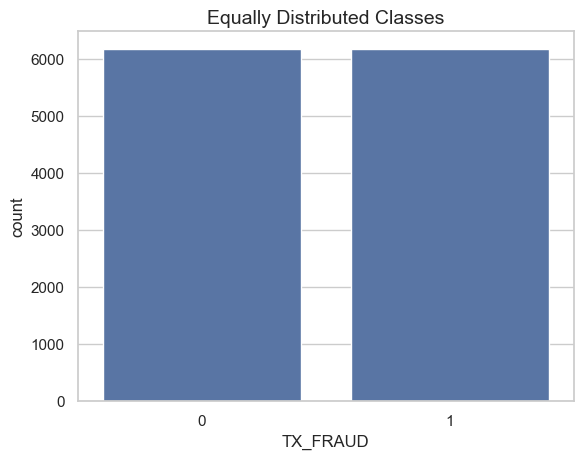

In [157]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['TX_FRAUD'].value_counts()/len(new_df))

sns.countplot(new_df, x='TX_FRAUD')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

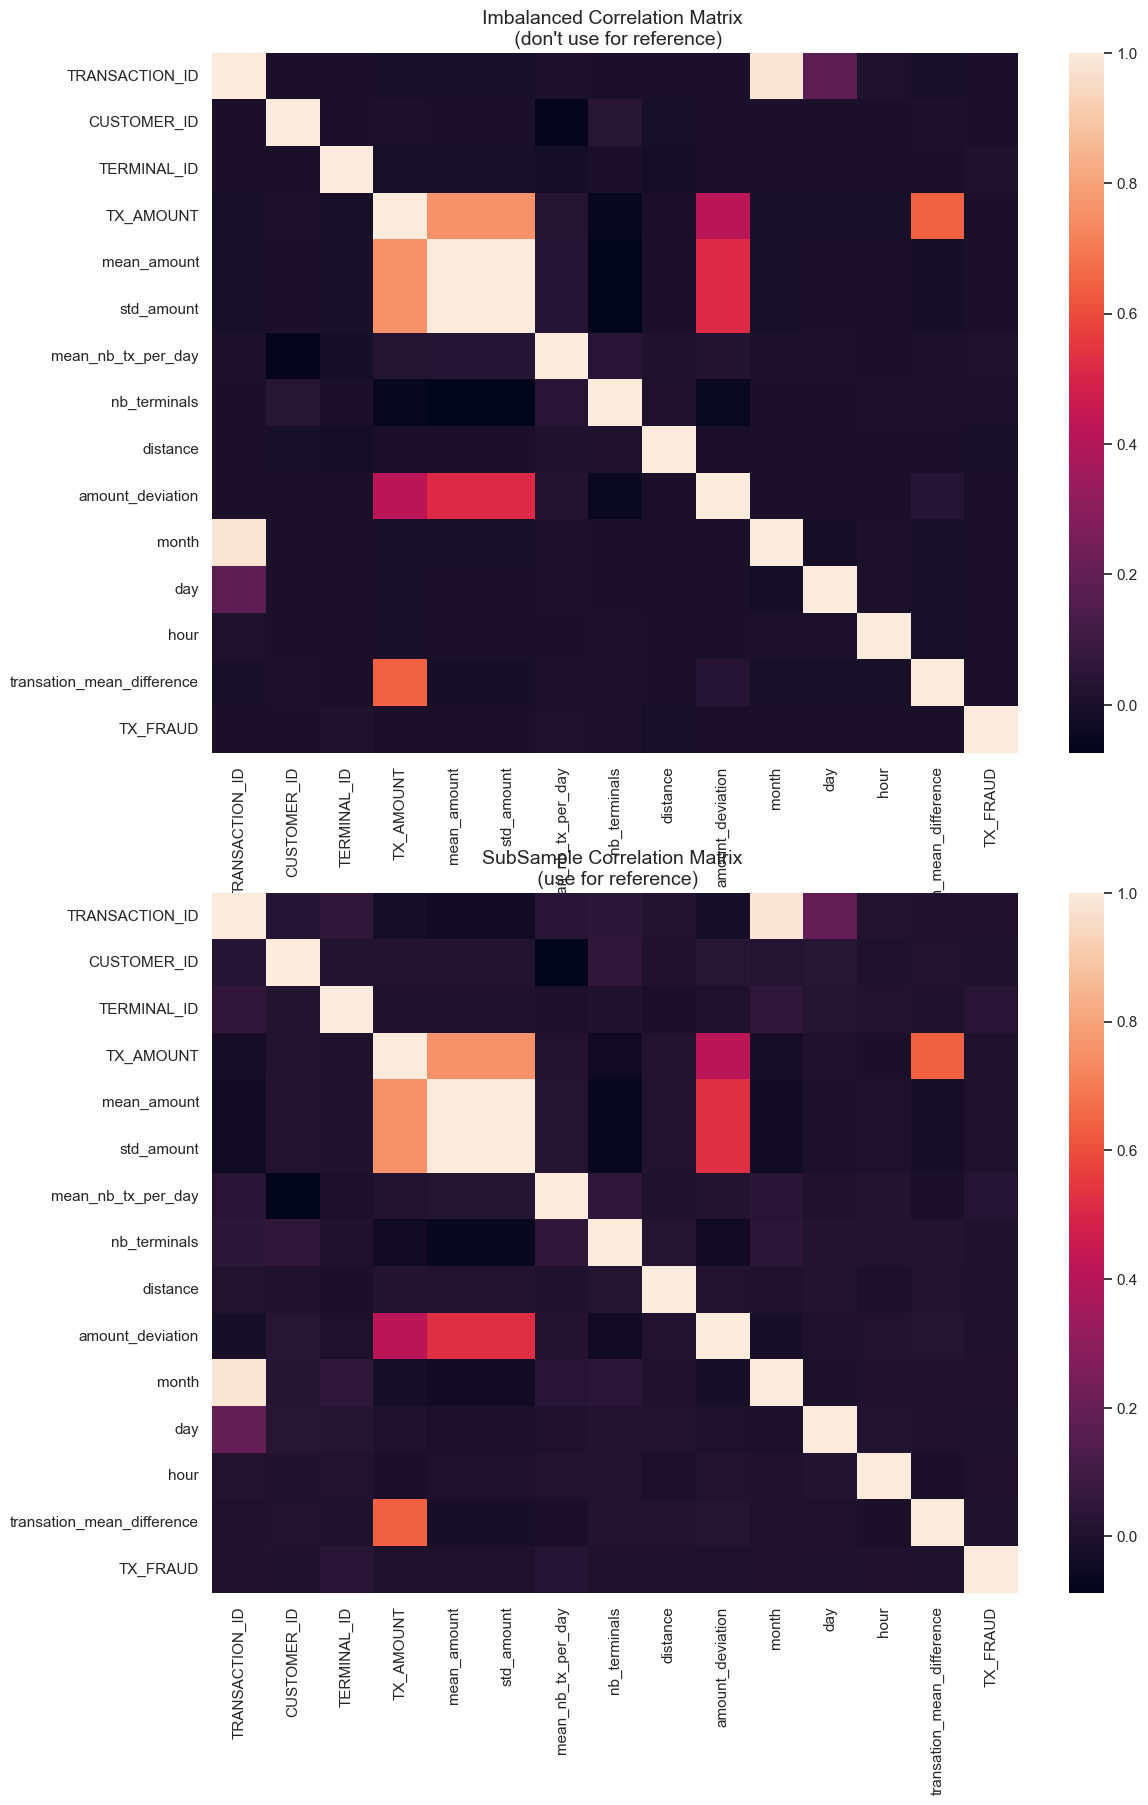

In [166]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr,  annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,  annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Droping correlated features:

In [167]:
new_df.drop(columns= ["std_amount", "TRANSACTION_ID", "CUSTOMER_ID", "amount_deviation"], inplace= True)

In [168]:
from sklearn.manifold import TSNE
import time

# New_df is from the random undersample data (fewer instances)
X = new_df.drop('TX_FRAUD', axis=1)
y = new_df['TX_FRAUD']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))



T-SNE took 8e+01 s
PCA took 0.04 s


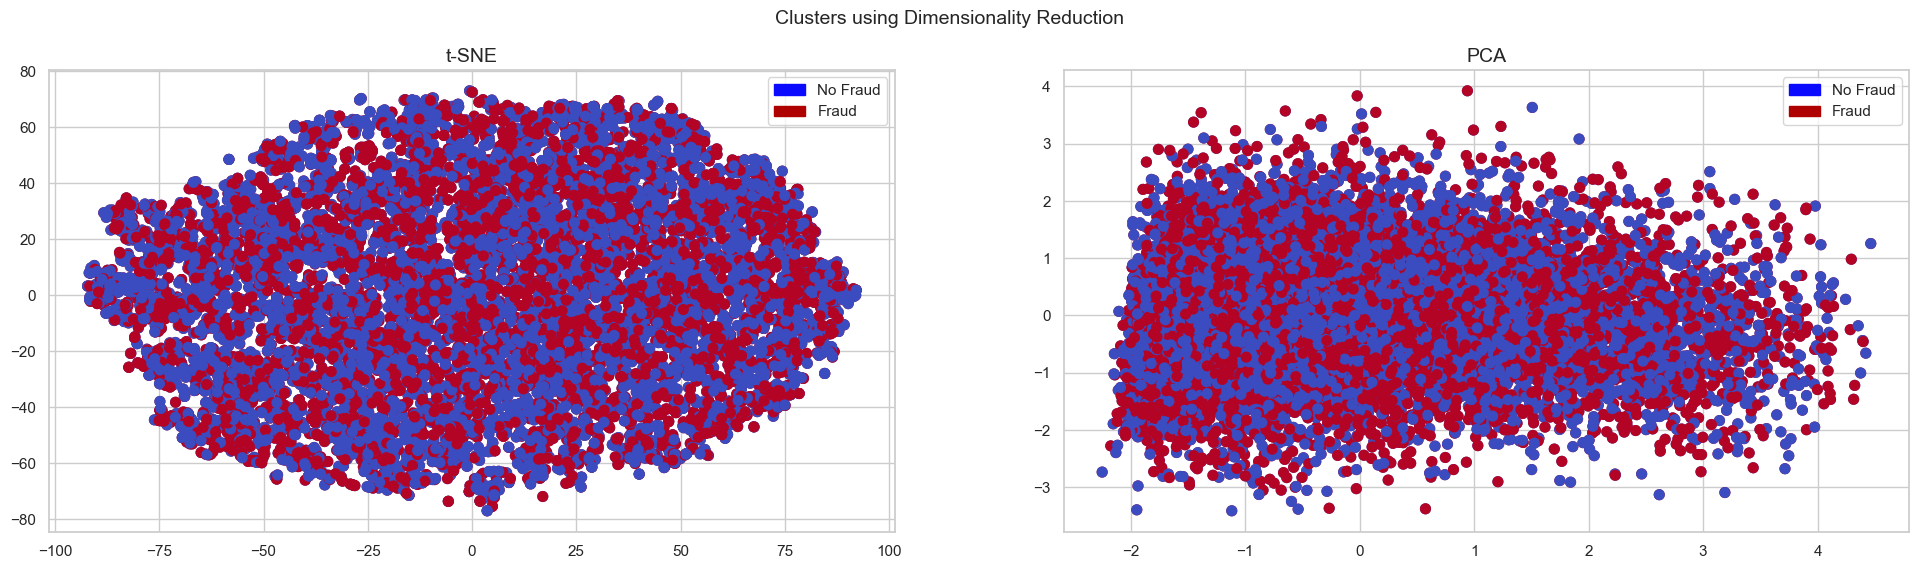

In [169]:
import matplotlib.patches as mpatches

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])